# ASSIGNMENT QUESTIONS

# EDA 1

1. What is the range of selling prices in the dataset?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS (1).csv to BIKE DETAILS (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS (1).csv")

In [ ]:
print("Minimum price : ",df["selling_price"].min())
print("Maximum price : ",df["selling_price"].max())
print("Range : ",df["selling_price"].max()-df["selling_price"].min())

Minimum price :  5000
Maximum price :  760000
Range :  755000


2. What is the median selling price for bikes in the dataset?

In [ ]:
median_price=df["selling_price"].median()
print("Median selling price",median_price)

Median selling price 45000.0


3. What is the most common seller type?

In [ ]:
most_common_seller=df["seller_type"].value_counts().idxmax()
print(most_common_seller)

Individual


4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
count=df[df["km_driven"]>50000].shape[0]
print(count)

170


5. What is the average km_driven value for each ownership type?

In [ ]:
avg_km_driven_value=df.groupby("owner")["km_driven"].mean()
print(avg_km_driven_value)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. What proportion of bikes are from the year 2015 or older?

In [ ]:
older_bikes=df[df["year"]<=2015].shape[0]
total_bikes=df.shape[0]
proportion=older_bikes/total_bikes
print(proportion)

0.5664467483506126


7. What is the trend of missing values across the dataset?

In [ ]:
missing_values=df.isnull().sum()
missing_trend=missing_values[missing_values>0]
print(missing_values)
print(missing_trend)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
ex_showroom_price    435
dtype: int64


8. What is the highest ex_showroom_price recorded, and for which bike?


In [ ]:
df=df.dropna(subset=["ex_showroom_price"])
max_row=df[df["ex_showroom_price"]==df['ex_showroom_price'].max()]
print(max_row["ex_showroom_price"].values[0])
print(max_row["name"].values[0])

1278000.0
Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type?

In [ ]:
seller_counts=df["seller_type"].value_counts()
print(seller_counts)

seller_type
Individual    623
Dealer          3
Name: count, dtype: int64


10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
first_owner_bikes=df[df["owner"]=="1st owner"]
correlation=first_owner_bikes["selling_price"].corr(first_owner_bikes["km_driven"])
print(correlation)


-0.21195897182696316


11. Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
Q1=df["km_driven"].quantile(0.25)
Q3=df["km_driven"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_no_outliers=df[(df["km_driven"]>=lower_bound)&(df["km_driven"]<=upper_bound)]
print(df.shape[0])
print(df_no_outliers.shape[0])

626
603


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

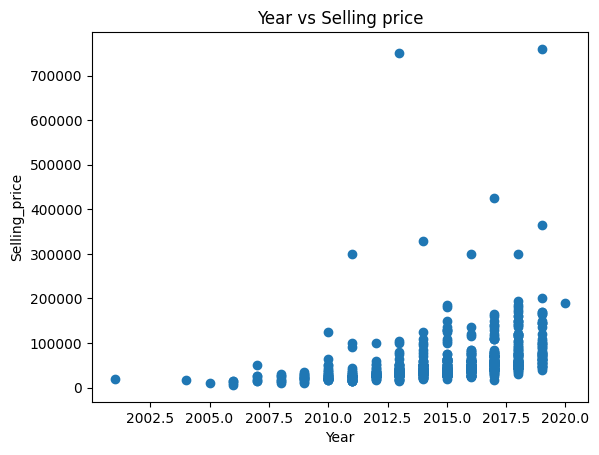

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["year"],df["selling_price"])
plt.xlabel("Year")
plt.ylabel("Selling_price")
plt.title("Year vs Selling price")
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [ ]:
from datetime import datetime
current_year=datetime.now().year
df["age"]=current_year-df["year"]
avg_price=df.groupby("age")["selling_price"].mean()
print(avg_price)

age
5     190000.000000
6     111125.000000
7      87837.662338
8      70529.411765
9      53597.440476
10     54550.000000
11     49453.030303
12     52349.056604
13     32810.486486
14     36787.878788
15     32057.142857
16     22642.857143
17     19871.428571
18     24983.333333
19     11500.000000
20     10000.000000
21     18000.000000
24     20000.000000
Name: selling_price, dtype: float64


14. Which bike names are priced significantly above the average price for their manufacturing year ?

In [ ]:
avg_by_year=df.groupby("year")["selling_price"].mean()
df["avg_price_for_year"]=df["year"].map(avg_by_year)
high_price_bikes=df[df["selling_price"]>1.3*df["avg_price_for_year"]]
print(high_price_bikes[["name","year","selling_price","avg_price_for_year"]])

                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
19                            Yamaha FZ25  2018         120000   
37                         Honda CBR-250R  2016         120000   
...                                   ...   ...            ...   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   
1008                   Bajaj Pulsar 220 F  2012          52000   
1023               Bajaj Avenger 220 dtsi  2012          45000   

      avg_price_for_year  
2           87837.662338  
13         111125.000000  
18          87837.662338  
19          87837.662338  
37          53597.440476  
...                  ...  
983         54550.

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

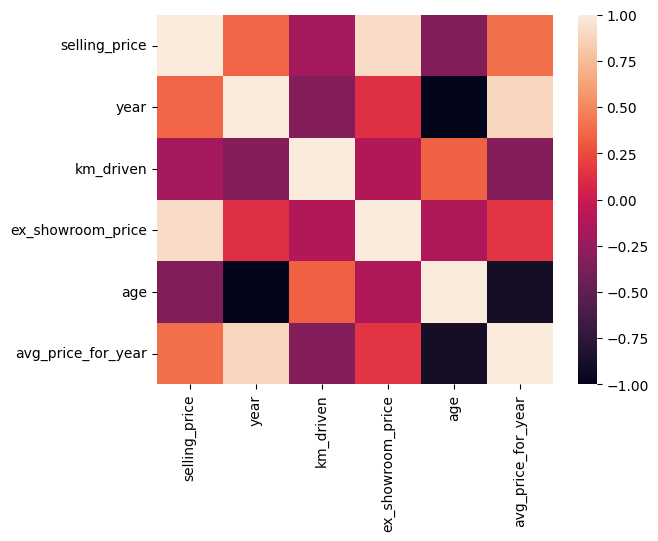

In [ ]:
import seaborn as sns
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix)
plt.show()

# EDA 2

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd
df=pd.read_csv("Car Sale.csv")

In [ ]:
avg_price_by_dealer=df.groupby("Dealer_Name")["Price ($)"].mean().reset_index()
avg_price_by_dealer.columns=["Dealer","Average_price"]
avg_price_by_dealer=avg_price_by_dealer.sort_values(by="Average_price",ascending=False)
print(avg_price_by_dealer)

                                             Dealer  Average_price
27                                        U-Haul CO   28769.919006
5                                     Classic Chevy   28602.014446
19                             Rabun Used Car Sales   28527.536177
11                                  Iceberg Rentals   28522.958533
8                             Enterprise Rent A Car   28312.580800
23                Scrivener Performance Engineering   28297.371589
9                        Gartner Buick Hyundai Saab   28247.621019
22                                 Saab-Belle Dodge   28190.139888
2                                       Capitol KIA   28189.703822
20                                    Race Car Help   28163.372706
4                            Chrysler of Tri-Cities   28123.091054
24                             Star Enterprises Inc   28113.055244
25                                    Suburban Ford   28112.206758
1                                  C & M Motors Inc   28111.75

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [ ]:
price_variation=df.groupby("Company")["Price ($)"].std().reset_index()
price_variation.columns=["Company","Price_variation"]
highest_variation=price_variation.sort_values(by="Price_variation",ascending=False).head(1)
print(highest_variation)

    Company  Price_variation
15  Lincoln     19658.050211


-  The higher the price variation, the more diverse and flexible the company is in terms of pricing strategy.

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [ ]:
price_stats=df.groupby("Transmission")["Price ($)"].describe(percentiles=[0.25,0.5,0.75])
price_stats=price_stats[["25%","50%","75%"]].reset_index()
price_stats["IQR"]=price_stats["75%"]-price_stats["25%"]
print(price_stats)

  Transmission      25%      50%      75%      IQR
0         Auto  19000.0  24000.0  35500.0  16500.0
1       Manual  17000.0  22001.0  34000.0  17000.0


-  A larger IQR means prices for that transmission type are more spread out in the middle range.A smaller IQR means prices are more tightly clustered.

4. What is the distribution of car prices across different regions?

In [ ]:
region_price_stats=df.groupby("Dealer_Region")["Price ($)"].describe(percentiles=[0.25,0.5,0.75]).reset_index()
print(region_price_stats)

  Dealer_Region   count          mean           std     min      25%      50%  \
0        Aurora  3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
1        Austin  4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
2    Greenville  3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
3    Janesville  3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
4    Middletown  3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
5         Pasco  3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
6    Scottsdale  3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

       75%      max  
0  35000.0  85800.0  
1  35001.0  85601.0  
2  34500.0  85200.0  
3  34000.0  85400.0  
4  34000.0  85300.0  
5  34000.0  85600.0  
6  33500.0  85001.0  


5. What is the distribution of cars based on body styles?

In [ ]:
body_style_counts=df["Body Style"].value_counts().reset_index()
print(body_style_counts)

  Body Style  count
0        SUV   6374
1  Hatchback   6128
2      Sedan   4488
3  Passenger   3945
4    Hardtop   2971


6. How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
avg_price=df.groupby(["Gender","Annual Income"])["Price ($)"].mean().reset_index()
print(avg_price)

      Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [ ]:
region_stats=df.groupby("Dealer_Region")["Price ($)"].agg(["mean","count"]).reset_index()
print(region_stats)

  Dealer_Region          mean  count
0        Aurora  28334.626837   3130
1        Austin  28341.603628   4135
2    Greenville  28180.819054   3128
3    Janesville  27833.350955   3821
4    Middletown  27856.338875   3128
5         Pasco  28119.039923   3131
6    Scottsdale  27954.958928   3433


8. How does the average car price differ between cars with different engine sizes?

In [ ]:
avg_price_by_engine=df.groupby("Engine")["Price ($)"].mean().reset_index()
print(avg_price_by_engine)

                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631


9. How do car prices vary based on the customer’s annual income bracket?

In [ ]:
avg_price_by_income=df.groupby("Annual Income")["Price ($)"].mean().reset_index()
print(avg_price_by_income)

      Annual Income     Price ($)
0             10080  22801.000000
1             13500  27878.981415
2             24000  61001.000000
3             85000  43000.000000
4            106000  46001.000000
...             ...           ...
2503        6600000  39000.000000
2504        6800000  15000.000000
2505        7650000  21000.000000
2506        8000000  85000.000000
2507       11200000  26001.000000

[2508 rows x 2 columns]


10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup']


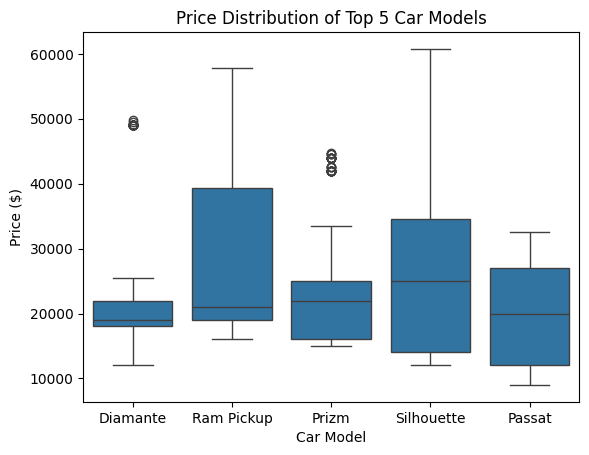

In [ ]:
top_models=df["Model"].value_counts().head(5).index.tolist()
print(top_models)
top_models_df=df[df["Model"].isin(top_models)]
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Model",y="Price ($)",data=top_models_df)
plt.title("Price Distribution of Top 5 Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

<Axes: xlabel='Engine', ylabel='Price ($)'>

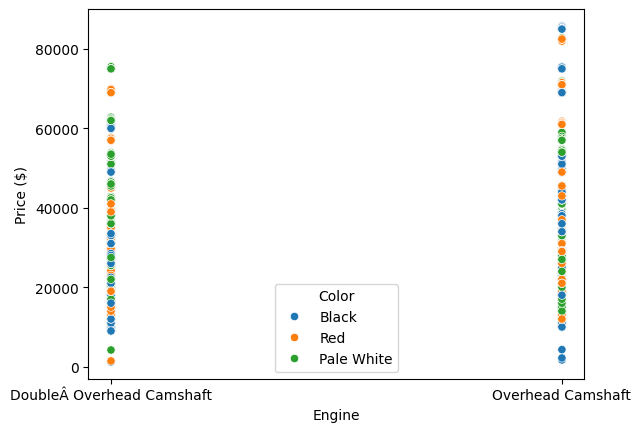

In [ ]:
sns.scatterplot(data=df,x="Engine",y="Price ($)",hue="Color")

In [ ]:
variation=df.groupby("Color")["Price ($)"].agg(["mean","std","min","max"])
variation["range"]=variation["max"]-variation["min"]
print(variation.sort_values("range",ascending=False))

                    mean           std   min    max  range
Color                                                     
Black       28564.798015  15286.065976  1200  85800  84600
Red         28736.319007  15519.360962  1450  82600  81150
Pale White  27483.890370  14077.346859  4200  82800  78600


-  Red color cars have the highest price variation.

12. Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df=pd.read_csv("Car Sale.csv")
print(df["Date"].dtype)

Saving Car Sale.csv to Car Sale.csv
object


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df["Month_Name"]=df["Date"].dt.strftime('%B')


In [ ]:
monthly_sales=df.groupby("Month")["Car_id"].count().reset_index()
monthly_sales.columns=["Month","Number_of_Cars_sold"]


In [ ]:
print(monthly_sales)

    Month  Number_of_Cars_sold
0       1                  790
1       2                  735
2       3                 1535
3       4                 1655
4       5                 1895
5       6                 1715
6       7                 1725
7       8                 1705
8       9                 3305
9      10                 1830
10     11                 3470
11     12                 3546


-   These trends suggest that car purchases are significantly higher in the last quarter of the year, especially during festive months like September to December (possibly due to events like Diwali, year-end bonuses, or new model launches).The lowest activity in the first two months (Jan–Feb) may be due to post-festival slowdown or financial planning at the start of the year. Therefore, the data clearly shows a seasonal trend in car sales.

13. How does the car price distribution change when considering different combinations of body style and
transmission type?

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df=pd.read_csv("Car Sale.csv")
print(df["Date"].dtype)

Saving Car Sale.csv to Car Sale.csv
object


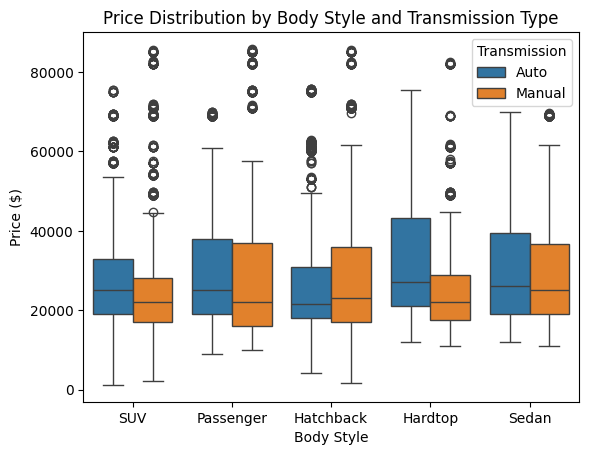

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Body Style",y="Price ($)",hue="Transmission",data=df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.show()

14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


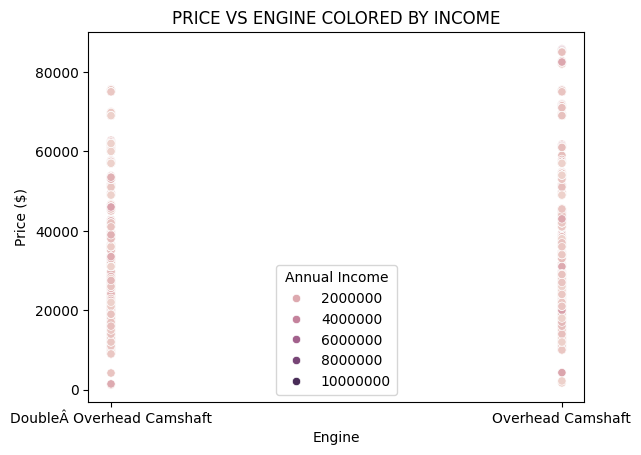

In [ ]:
num_features=df[["Price ($)","Annual Income"]]
correlation_matrix=num_features.corr()
print(correlation_matrix)
sns.scatterplot(data=df,x="Engine",y="Price ($)",hue="Annual Income")
plt.title("PRICE VS ENGINE COLORED BY INCOME")
plt.show()

15. How does the average car price vary across different car models and engine types?

In [ ]:
grouped=df.groupby(["Model","Engine"])["Price ($)"].mean().reset_index()
print(grouped)

        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


# EDA 3

1. What is the average rating for each product category?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [ ]:
import pandas as pd
df=pd.read_csv("amazon.csv")

In [ ]:
df["rating"]=pd.to_numeric(df["rating"],errors="coerce")
avg_rating_per_category=df.groupby("category")["rating"].mean().reset_index()

print(avg_rating_per_category)

                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


2. What are the top rating_count products by category?

In [ ]:
df_sorted=df.sort_values(["category","rating_count"],ascending=[True,False])
top_products=df_sorted.groupby("category").first().reset_index()
top_products[["category","product_name","rating_count"]]

,category,product_name,rating_count
0,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
1,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
2,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
3,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
4,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


3. What is the distribution of discounted prices vs. actual prices?

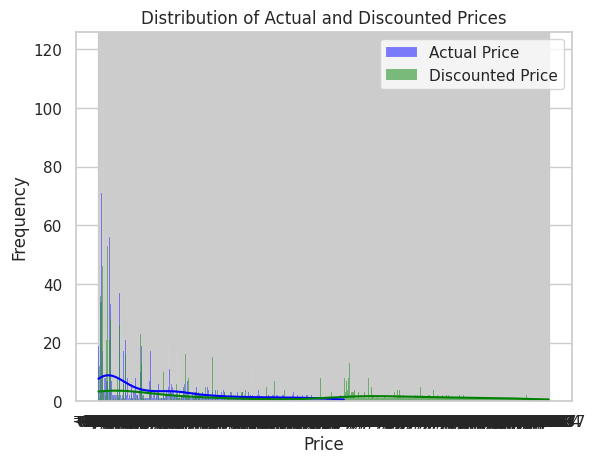

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.histplot(df["actual_price"],color="blue",label="Actual Price",kde=True,bins=30)
sns.histplot(df["discounted_price"],color="green",label="Discounted Price",kde=True,bins=30)
plt.title("Distribution of Actual and Discounted Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


4. How does the average discount percentage vary across categories?

In [ ]:
df["discount_percentage"]=df["discount_percentage"].str.rstrip("%").astype(float)
avg_discount_by_category=df.groupby("category")["discount_percentage"].mean().reset_index()
print(avg_discount_by_category)

                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


5. What are the most popular product names?

In [ ]:
popular_products=df["product_name"].value_counts().reset_index()
popular_products.columns=["product_name","count"]
print(popular_products.head(10))

                                        product_name  count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4
2  Amazonbasics Nylon Braided Usb-C To Lightning ...      3
3  Duracell USB Lightning Apple Certified (Mfi) B...      3
4        Flix Micro Usb Cable For Smartphone (Black)      3
5  Fire-Boltt India's No 1 Smartwatch Brand Talk ...      3
6  Wayona Nylon Braided USB to Lightning Fast Cha...      3
7  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...      3
8  Sounce Fast Phone Charging Cable & Data Sync U...      3
9  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...      3


6. What are the most popular product keywords?

In [ ]:
df["product_name"]=df["product_name"].str.lower()
df["words"]=df["product_name"].str.split()
all_words=df["words"].explode()
top_words=all_words.value_counts().head(10)
print(top_words)


words
with        751
for         672
|           457
&           432
usb         377
and         330
cable       320
-           220
charging    219
to          218
Name: count, dtype: int64


7. What are the most popular product reviews?

In [ ]:
top_reviews=df["review_title"].value_counts().head(10)
print(top_reviews)

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good pro

8. What is the correlation between discounted_price and rating?

In [ ]:
df["discounted_price"]=df["discounted_price"].astype(str)
df["discounted_price"]=df["discounted_price"].str.replace("₹","",regex=False)
df["discounted_price"]=df["discounted_price"].str.replace(",","",regex=False)
df["discounted_price"]=pd.to_numeric(df["discounted_price"],errors="coerce")
df["rating"]=pd.to_numeric(df["rating"],errors="coerce")
print(df[["discounted_price","rating"]].isnull().sum())
df_clean=df[["discounted_price","rating"]].dropna()
correlation=df_clean["discounted_price"].corr(df_clean["rating"])
print(correlation)

discounted_price    1
rating              1
dtype: int64
1.0


9. What are the Top 5 categories based on the highest rating?

In [ ]:
category_ratings=df.groupby("category")["rating"].mean()
top_categories=category_ratings.sort_values(ascending=False).head(5)
print(top_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis.

In [ ]:
low_rated=df.groupby("category")["rating"].mean().sort_values().head(5)
print(low_rated)

category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters                                          3.6
Name: rating, dtype: float64


-   Action: Improve product quality, update descriptions, or investigate customer complaints.

# EDA 4

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [3]:
import pandas as pd
df=pd.read_csv("spotify.csv")

In [ ]:
print(df.isnull().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [ ]:
print(df.duplicated().sum())

27


In [ ]:
df=df.drop_duplicates()
print(df.head())

  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

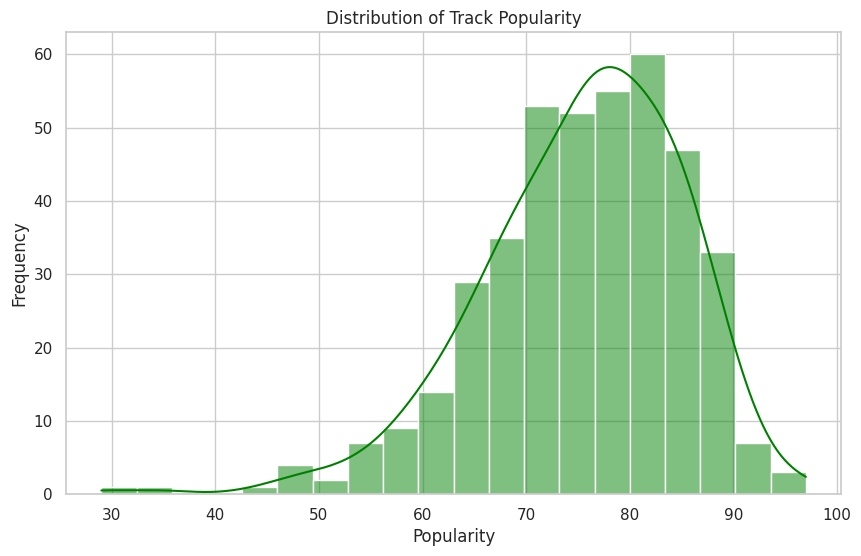

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(df["Popularity"],bins=20,kde=True,color="green")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

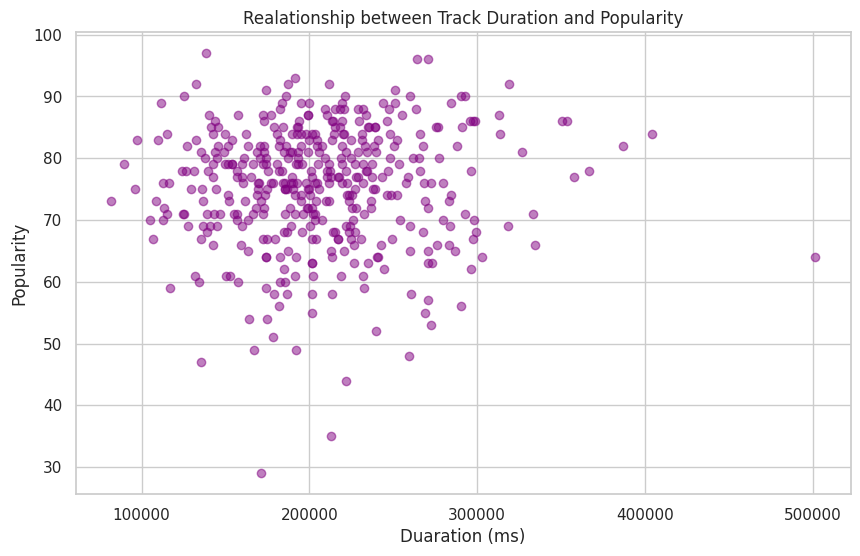

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df["Duration (ms)"],df["Popularity"],alpha=0.5,color="purple")
plt.title("Realationship between Track Duration and Popularity")
plt.xlabel("Duaration (ms)")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

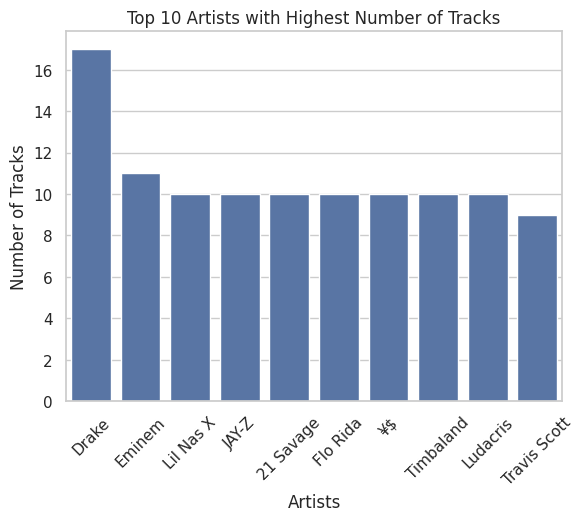

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
top_artists=df["Artist"].value_counts().head(10)
sns.countplot(data=df[df["Artist"].isin(top_artists.index)],x="Artist",order=top_artists.index)
plt.title("Top 10 Artists with Highest Number of Tracks")
plt.xlabel("Artists")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
least_popular_tracks=df.sort_values(by="Popularity",ascending=True).head(5)
result=least_popular_tracks[["Artist","Track Name","Popularity"]]
print(result)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


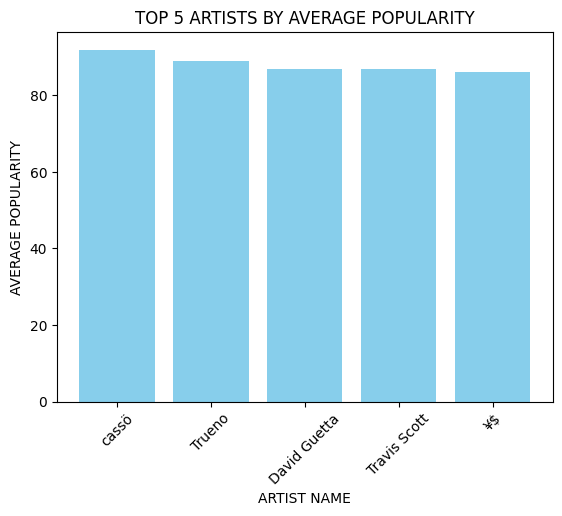

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
artist_avg_popularity=df.groupby("Artist")["Popularity"].mean().reset_index()
top_artists=artist_avg_popularity.sort_values(by="Popularity",ascending=False).head(5)
print(top_artists)
plt.bar(top_artists["Artist"],top_artists["Popularity"],color="skyblue")
plt.title("TOP 5 ARTISTS BY AVERAGE POPULARITY")
plt.xlabel("ARTIST NAME")
plt.ylabel("AVERAGE POPULARITY")
plt.xticks(rotation=45)
plt.show()

7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [ ]:
top_artists=df.groupby("Artist")["Popularity"].mean().nlargest(5).index
df_top=df[df["Artist"].isin(top_artists)]
top_track=df_top.sort_values("Popularity",ascending=False).drop_duplicates("Artist")
print(top_track[["Artist","Track Name","Popularity"]])

           Artist                    Track Name  Popularity
280            ¥$                      CARNIVAL          96
30   Travis Scott    FE!N (feat. Playboi Carti)          93
140         cassö                         Prada          92
241        Trueno  Mamichula - con Nicki Nicole          89
200  David Guetta            Baby Don't Hurt Me          87


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

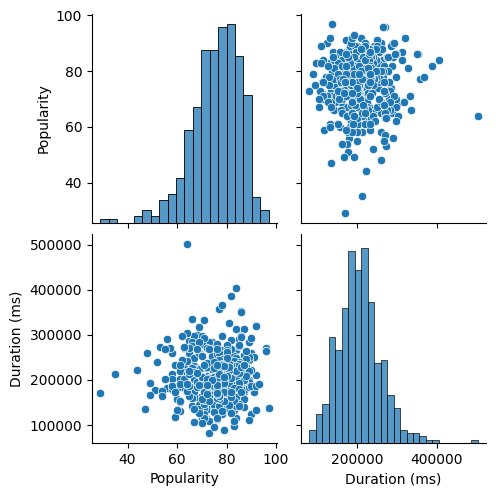

In [ ]:
import seaborn as sns
num_col=["Popularity","Duration (ms)","Artist","Track Name","Track ID"]
sns.pairplot(df[num_col])
plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

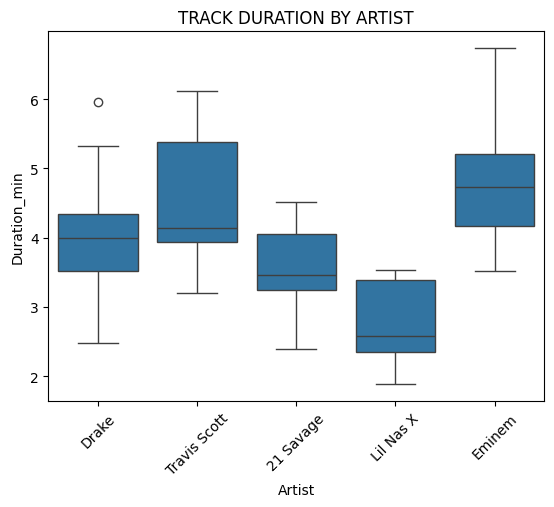

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df["Duration_min"]=df["Duration (ms)"]/60000
top_artist=df["Artist"].value_counts().head(5).index
df_top=df[df["Artist"].isin(top_artist)]
sns.boxplot(data=df_top,x="Artist",y="Duration_min")
plt.xticks(rotation=45)
plt.title("TRACK DURATION BY ARTIST")
plt.show()

-   The box plot illustrates clear variation in track durations across different artists.

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.



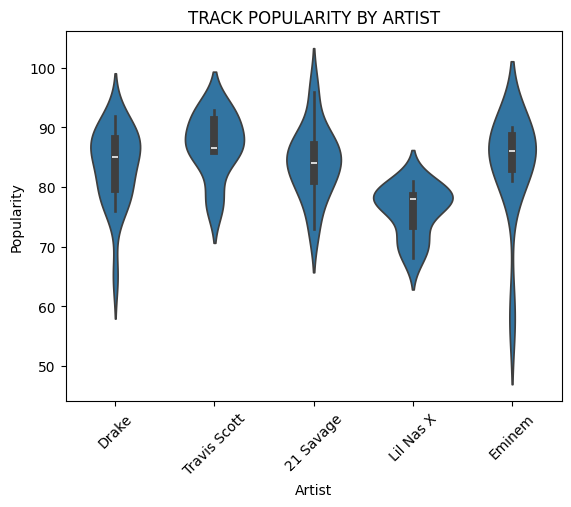

In [5]:
top_artist=df["Artist"].value_counts().head(5).index
df_top=df[df["Artist"].isin(top_artist)]
sns.violinplot(data=df_top,x="Artist",y="Popularity")
plt.title("TRACK POPULARITY BY ARTIST")
plt.xticks(rotation=45)
plt.show()